# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 30

Group Members:
- Aland Mulia Pratama (13522124)
- Rizqika Mulia Pratama (13522126)
- Christian Justin Hendrawan (13522135)
- Auralea Alvinia Syaikha (13522148)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

pd.set_option('display.max_columns', 200)

## Import Dataset

In [2]:
# Read train dataset
basic_df = pd.read_csv('../dataset/train/basic_features_train.csv')
label_df = pd.read_csv('../dataset/train/labels_train.csv')
flow_df = pd.read_csv('../dataset/train/flow_features_train.csv')
time_df = pd.read_csv('../dataset/train/time_features_train.csv')
content_df = pd.read_csv('../dataset/train/content_features_train.csv')
additional_df = pd.read_csv('../dataset/train/additional_features_train.csv')
modified_df = pd.read_csv('../dataset/train/UNSW-NB15_features-modified.csv')


In [3]:
# Read test dataset
basic_test = pd.read_csv('../dataset/test/basic_features_test.csv')
flow_test = pd.read_csv('../dataset/test/flow_features_test.csv')
time_test = pd.read_csv('../dataset/test/time_features_test.csv')
content_test = pd.read_csv('../dataset/test/content_features_test.csv')
additional_test = pd.read_csv('../dataset/test/additional_features_test.csv')
modified_test = pd.read_csv('../dataset/test/UNSW-NB15_features-modified.csv')

In [4]:
# Merge all of the data into one dataframe
train_df = pd.DataFrame()
train_df['id'] = basic_df['id']
train_df = pd.merge(train_df, basic_df, on='id')
train_df = pd.merge(train_df, flow_df, on='id')
train_df = pd.merge(train_df, time_df, on='id')
train_df = pd.merge(train_df, content_df, on='id')
train_df = pd.merge(train_df, additional_df, on='id')
train_df = pd.merge(train_df, label_df, on='id')

In [5]:
# Merge all of the data into one dataframe
test_df = pd.DataFrame()
test_df['id'] = basic_test['id']
test_df = pd.merge(test_df, basic_test, on='id')
test_df = pd.merge(test_df, flow_test, on='id')
test_df = pd.merge(test_df, time_test, on='id')
test_df = pd.merge(test_df, content_test, on='id')
test_df = pd.merge(test_df, additional_test, on='id')

In [6]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [7]:
# Show the dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state              166536 non-null  object 
 1   dur                166619 non-null  float64
 2   sbytes             166780 non-null  float64
 3   dbytes             166472 non-null  float64
 4   sttl               166516 non-null  float64
 5   dttl               166687 non-null  float64
 6   sloss              166547 non-null  float64
 7   dloss              166363 non-null  float64
 8   service            166550 non-null  object 
 9   sload              166555 non-null  float64
 10  dload              166504 non-null  float64
 11  spkts              166687 non-null  float64
 12  dpkts              166655 non-null  float64
 13  proto              166515 non-null  object 
 14  sjit               166603 non-null  float64
 15  djit               166495 non-null  float64
 16  si

In [8]:
# Gather the categorical and numerical columns
categotical_columns = []
numerical_columns = []

for column in train_df.columns:
    if train_df[column].dtype == 'object':
        categotical_columns.append(column)
    else:
        numerical_columns.append(column)

print("Categorical feature: ", categotical_columns)
print("Numerical feature: ", numerical_columns)


Categorical feature:  ['state', 'service', 'proto', 'attack_cat']
Numerical feature:  ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label']


In [9]:
# Show the first 20 rows of the dataframe
train_df.head(20)

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,255.0,255.0,4.864839e+08,4.926043e+08,58.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,Normal,0
1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,Generic,1
2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,255.0,255.0,3.835852e+09,2.010029e+08,170.0,114.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,Exploits,1
3,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,255.0,255.0,NaN,6.614436e+08,56.0,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,Normal,0
4,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,65.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,Normal,0
5,INT,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,dns,9.120000e+07,0.000000e+00,2.0,0.0,udp,NaN,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,Generic,1
6,INT,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.700000e+07,0.000000e+00,2.0,0.0,udp,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,NaN,57.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,9.0,9.0,NaN,9.0,9.0,9.0,9.0,Generic,1
7,FIN,1.465899,28660.0,NaN,254.0,252.0,14.0,3.0,-,1.518140e+05,4.169455e+03,34.0,16.0,tcp,NaN,125.553867,43.671909,NaN,0.140336,0.090759,0.049577,255.0,255.0,3.680557e+09,5.902739e+08,843.0,51.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0,2.0,NaN,1.0,4.0,Fuzzers,1
8,FIN,0.034137,NaN,3380.0,31.0,29.0,18.0,8.0,smtp,8.617278e+06,7.733544e+05,52.0,42.0,tcp,42.179459,NaN,0.689755,0.819268,0.000667,0.000542,NaN,255.0,255.0,4.019494e+09,1.875135e+09,721.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,Normal,0
9,FIN,0.022733,2958.0,33044.0,31.0,29.0,7.0,18.0,-,1.019487e+06,1.139630e+07,48.0,50.0,tcp,25.926994,26.607684,0.477085,0.452469,0.000682,0.000559,0.000123,255.0,255.0,2.991578e+09,3.016561e+09,62.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,6.0,5.0,2.0,2.0,1.0,1.0,3.0,Normal,0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [10]:
# 1. Basic statistics and info

print("Dataset Shape:", train_df.shape)
print("\nFeature Names:")
print(train_df.columns.tolist())
print("\nBasic Statistics:")
print(train_df.describe())

Dataset Shape: (175341, 43)

Feature Names:
['state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'proto', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']

Basic Statistics:
                 dur        sbytes        dbytes           sttl  \
count  166619.000000  1.667800e+05  1.664720e+05  166516.000000   
mean        1.359299  8.734079e+03  1.493589e+04     179.521944   
std         6.485386  1.712289e+05  1.430150e+05     102.957427   
min         0.000000  2.800000e+01  0.000000e+00       0.000000   
25%         0.000008  1.140000e+02  0.000000e+00      62.000000   
50%         0.001548  4.500000e+

In [11]:
# 2. Check missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           

In [12]:
# 3. Find out the unique values of each feature
print("\nUnique Values:")
for column in train_df.columns:
    print(column, ":", train_df[column].nunique())


Unique Values:
state : 9
dur : 70713
sbytes : 6997
dbytes : 6432
sttl : 11
dttl : 6
sloss : 394
dloss : 365
service : 13
sload : 77315
dload : 73756
spkts : 470
dpkts : 432
proto : 133
sjit : 73895
djit : 73045
sinpkt : 72757
dinpkt : 70746
tcprtt : 41517
synack : 38626
ackdat : 36365
swin : 11
dwin : 7
stcpb : 71744
dtcpb : 71536
smean : 1356
dmean : 1322
trans_depth : 11
response_body_len : 2327
is_sm_ips_ports : 2
ct_state_ttl : 5
ct_flw_http_mthd : 11
is_ftp_login : 4
ct_ftp_cmd : 4
ct_srv_src : 52
ct_srv_dst : 52
ct_dst_ltm : 50
ct_src_ltm : 50
ct_src_dport_ltm : 47
ct_dst_sport_ltm : 32
ct_dst_src_ltm : 54
attack_cat : 10
label : 2


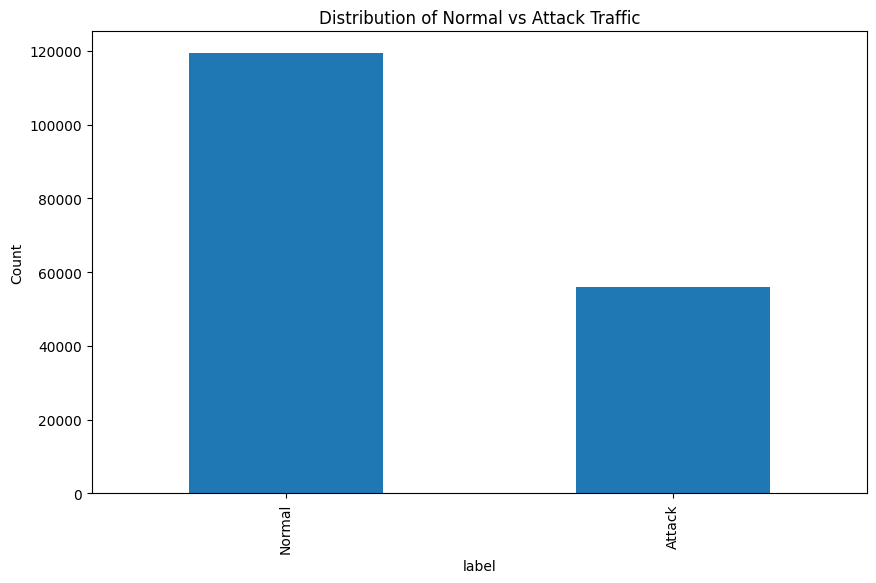

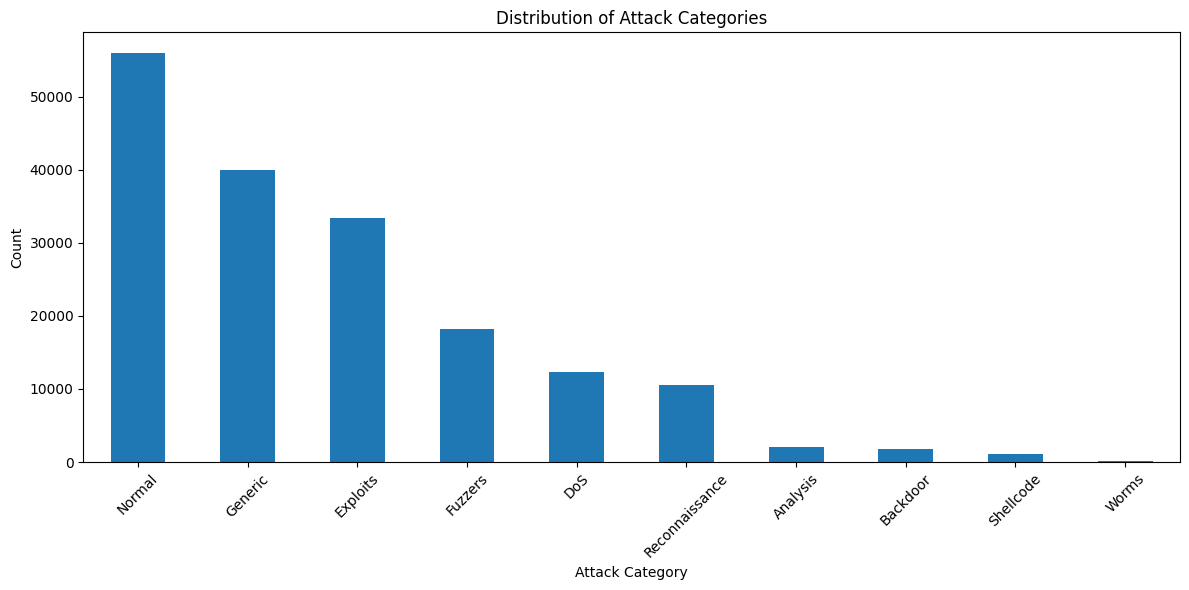

In [13]:
# 4. Feature distributions and class balance
plt.figure(figsize=(10, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Normal vs Attack Traffic')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Attack'])
plt.ylabel('Count')
plt.show()

# Attack category distribution
plt.figure(figsize=(12, 6))
train_df['attack_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

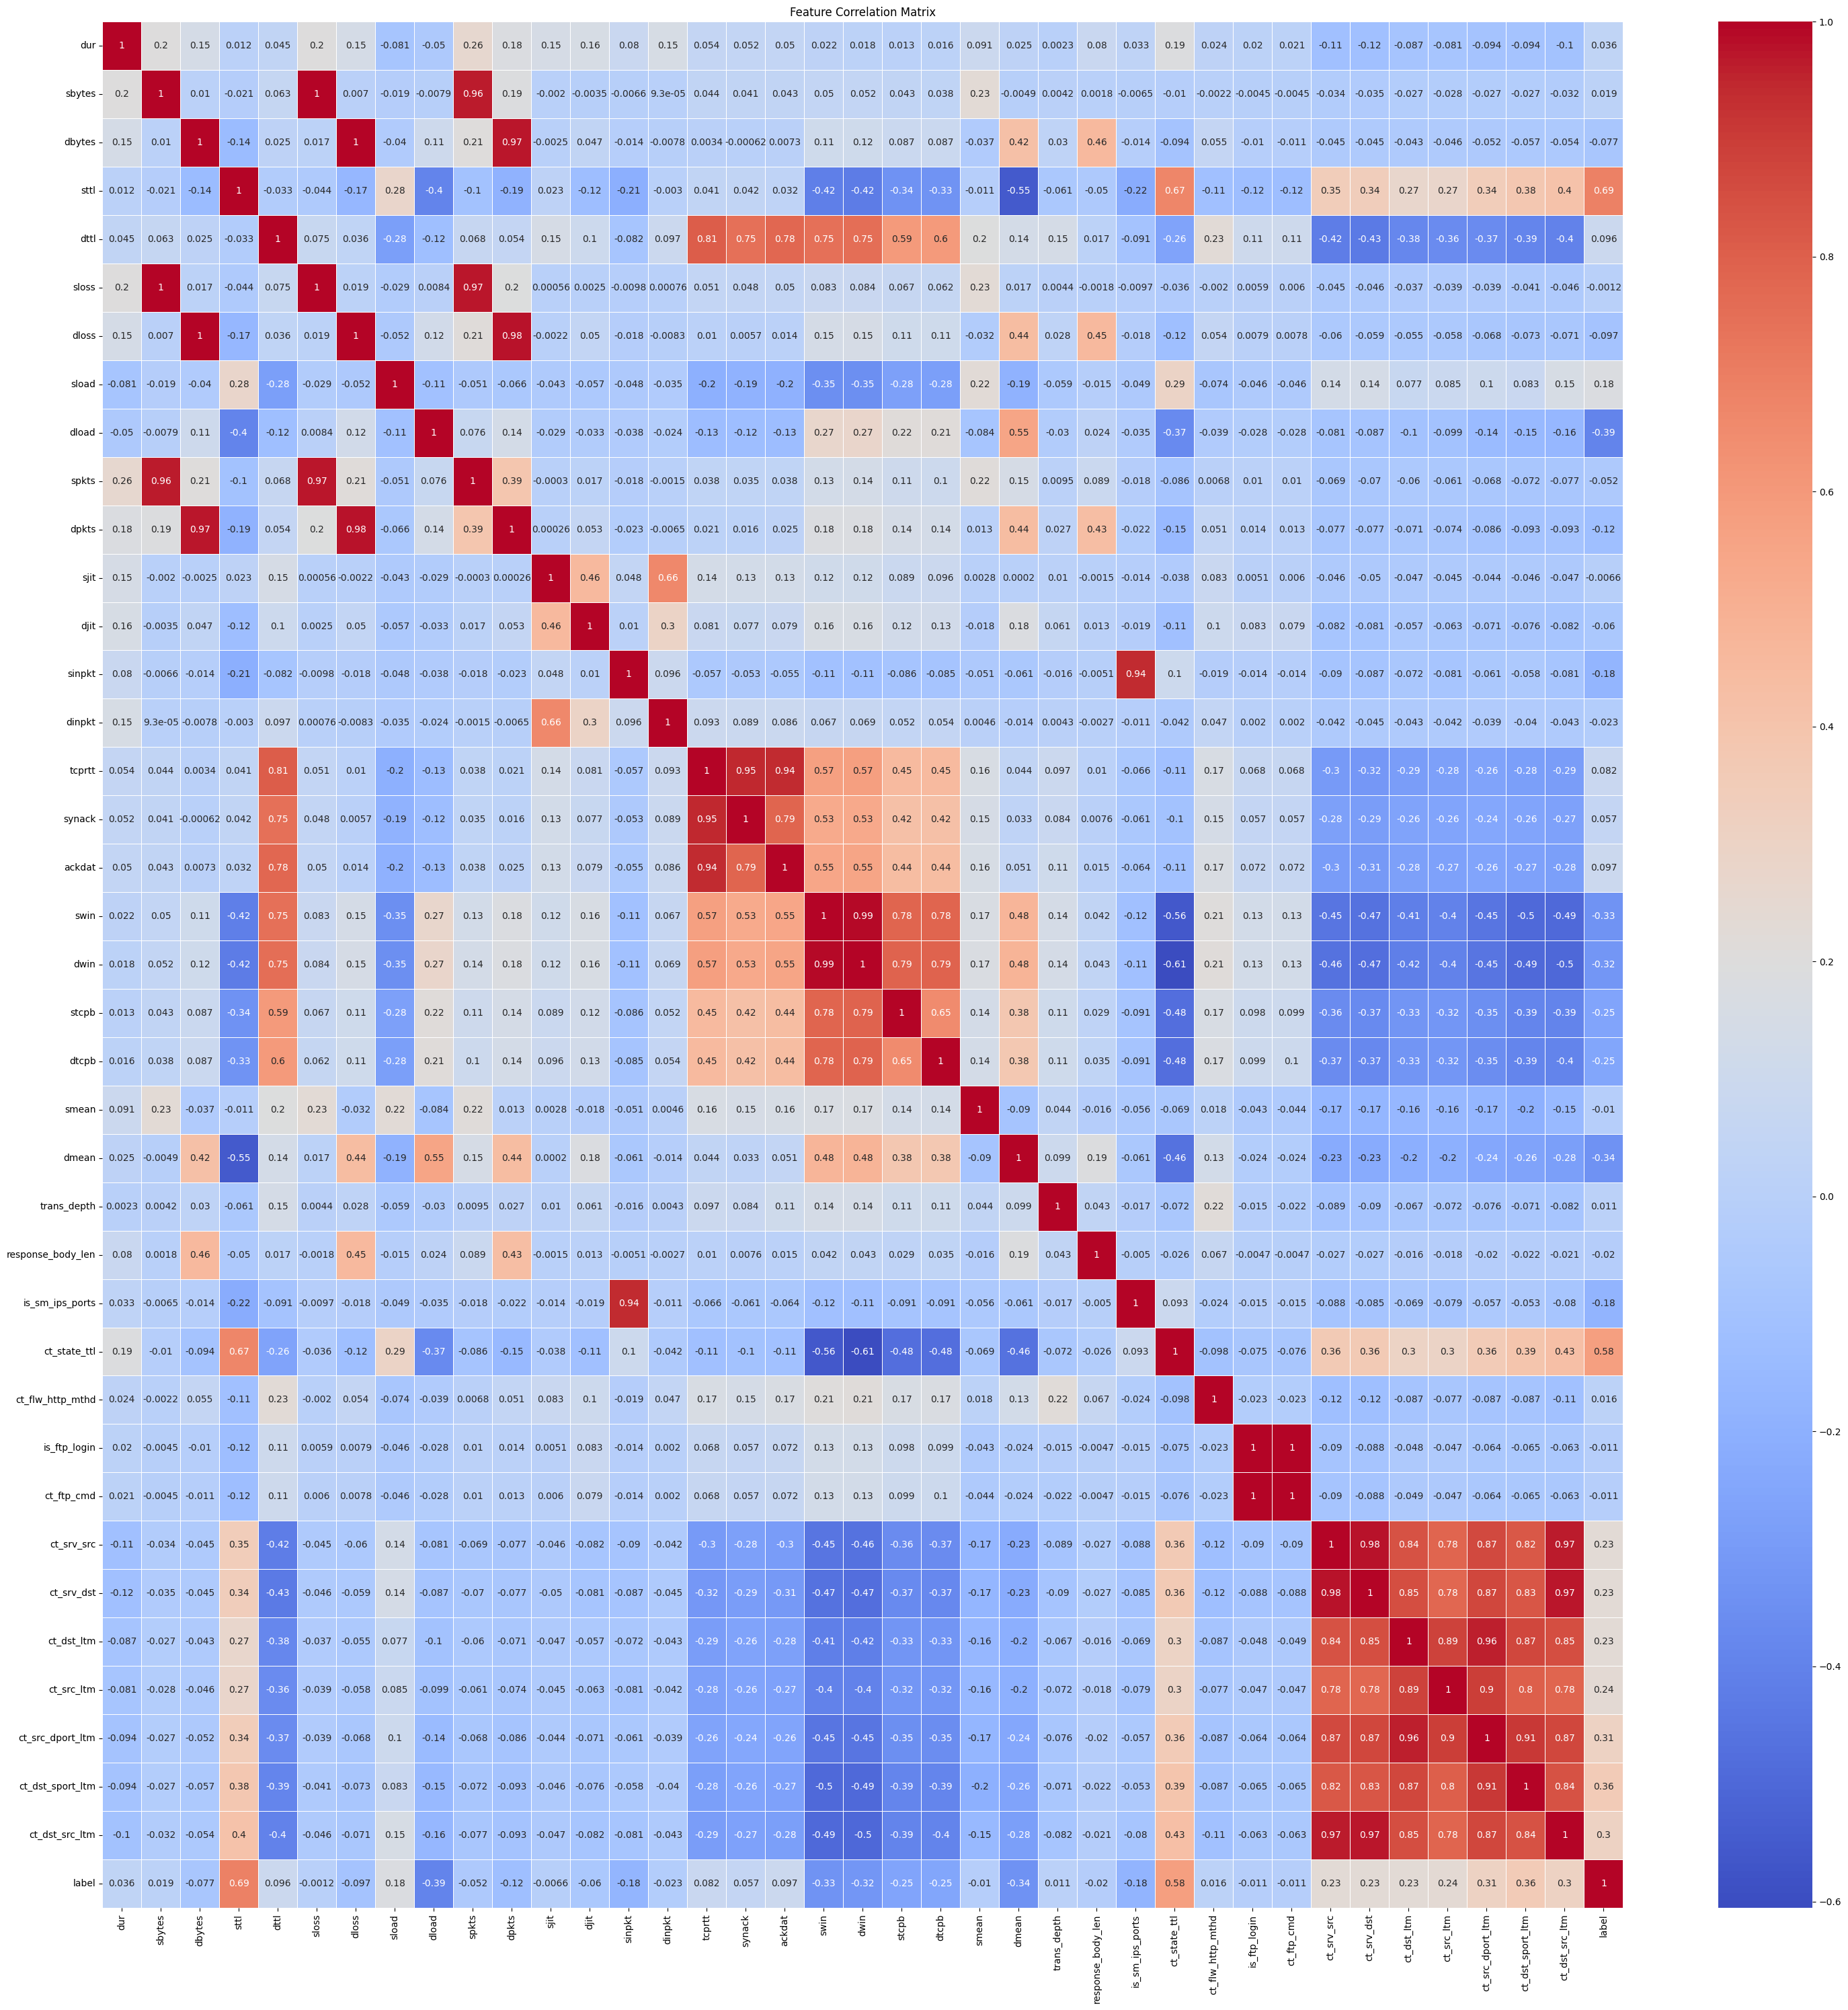

In [14]:
# 5. Correlation analysis
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

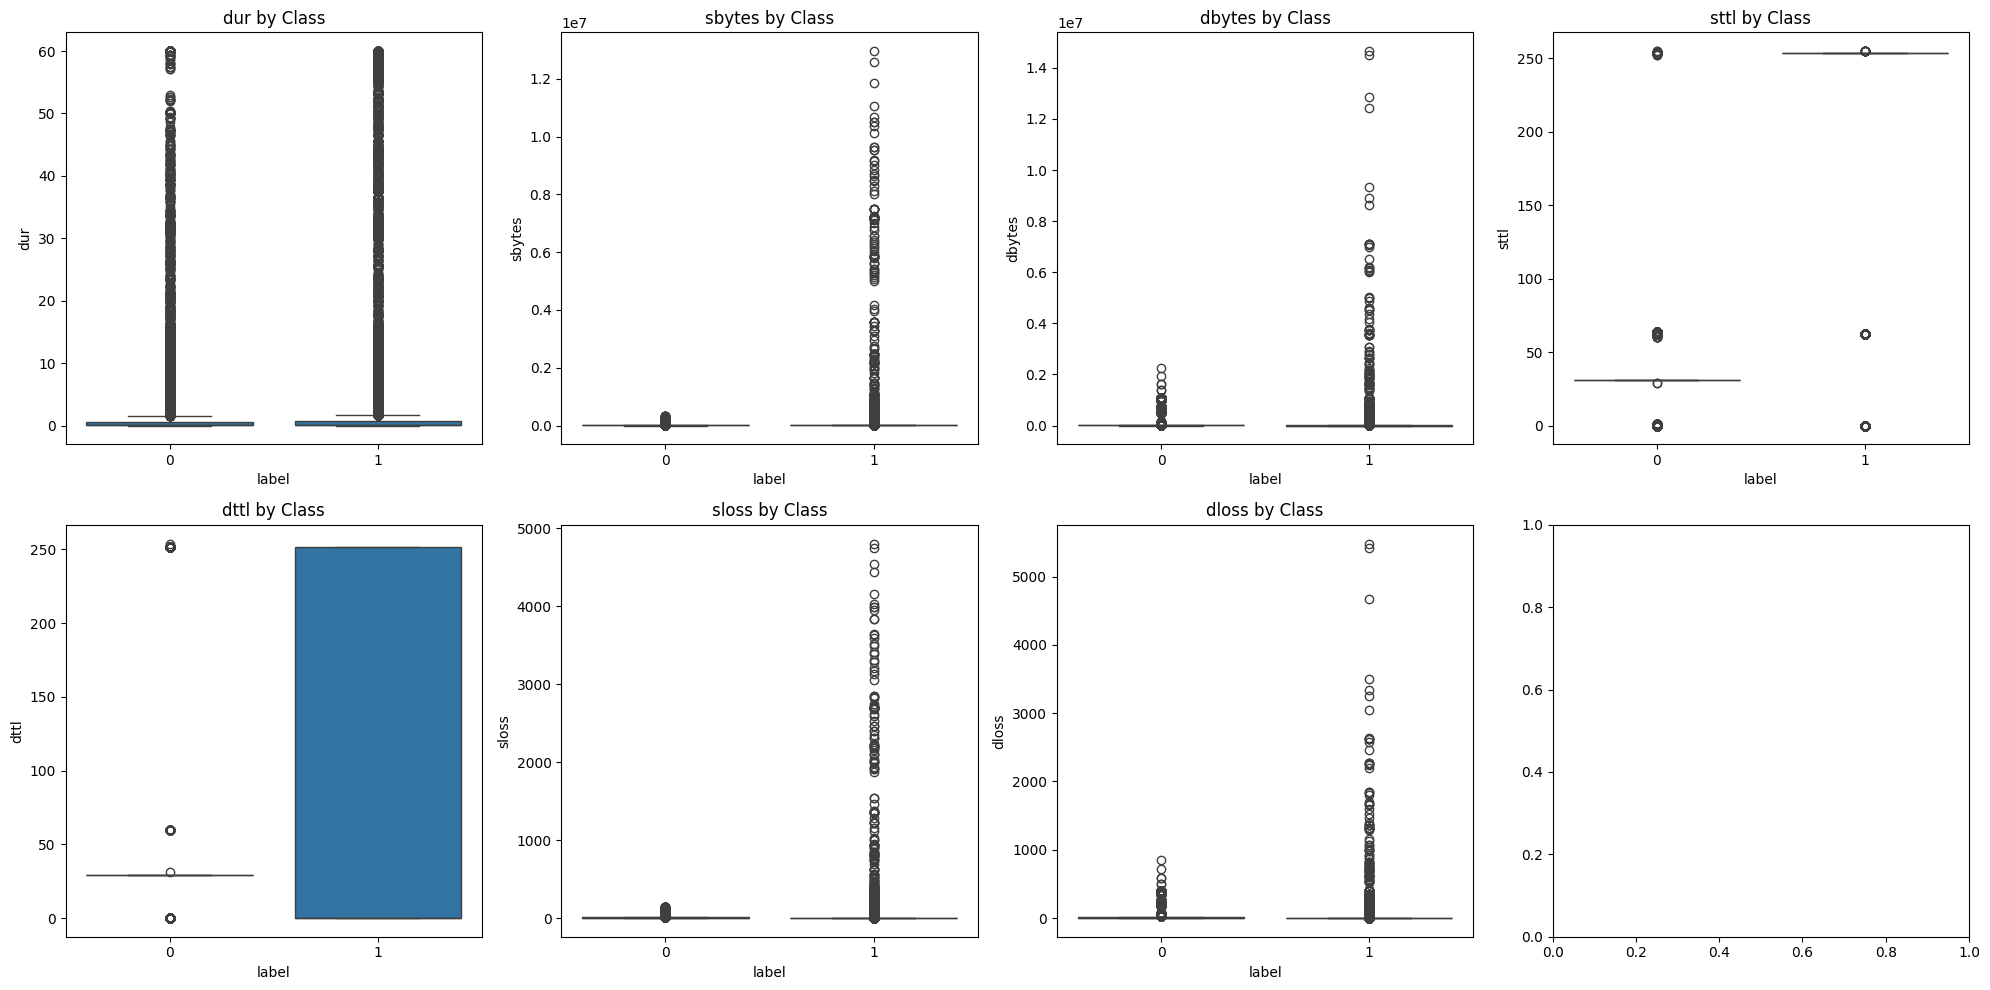

In [15]:
# 5. Box plots for key numeric features
key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    sns.boxplot(data=train_df, x='label', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Class')

plt.tight_layout()
plt.show()

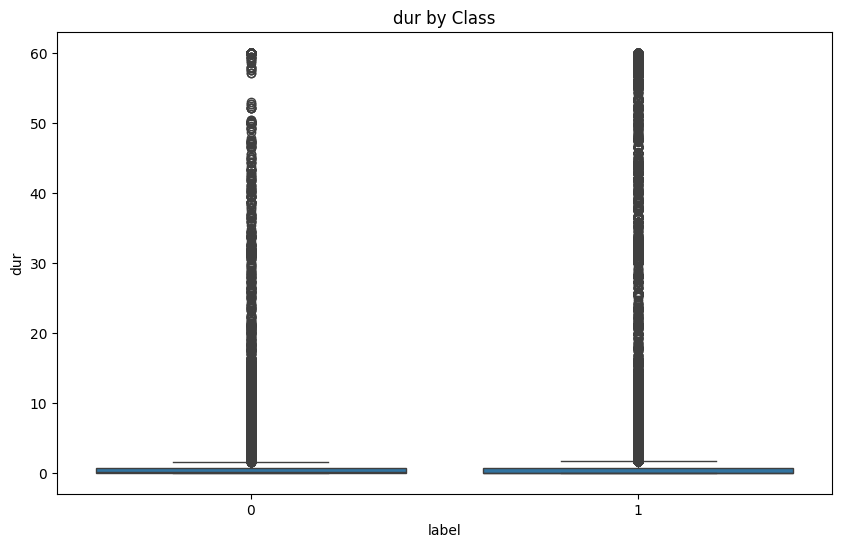

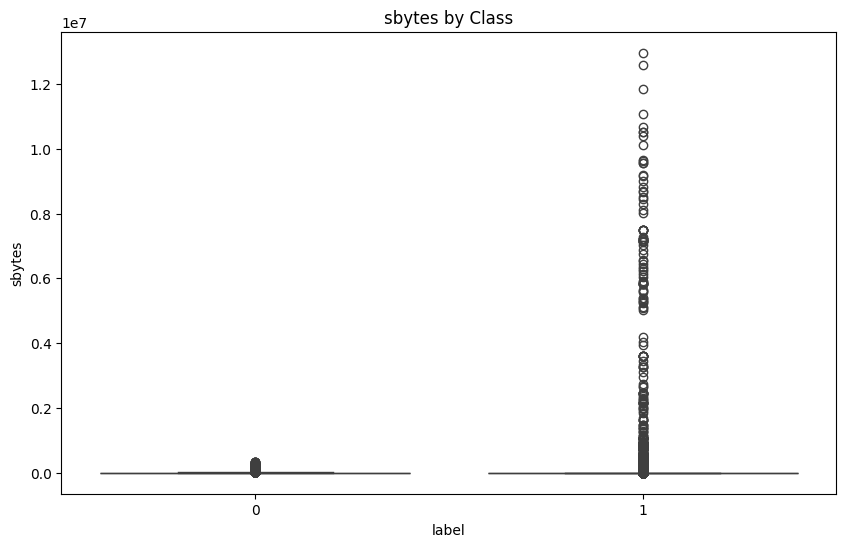

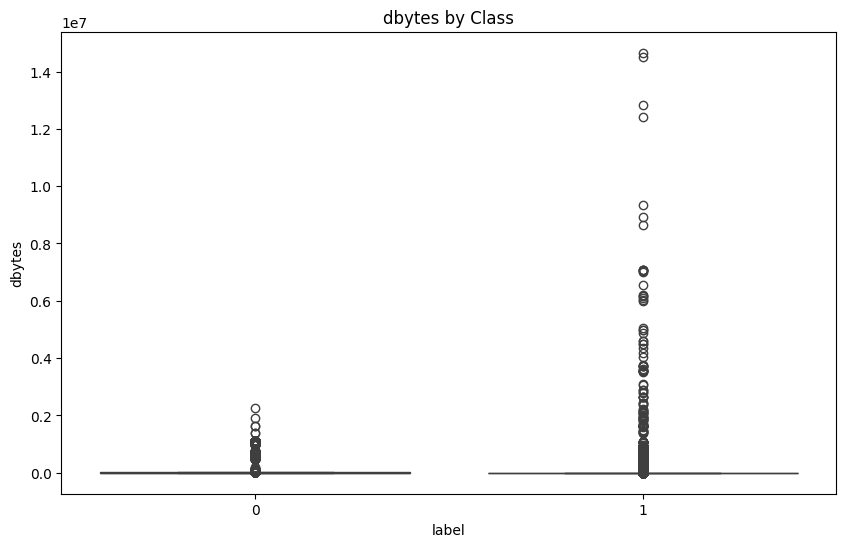

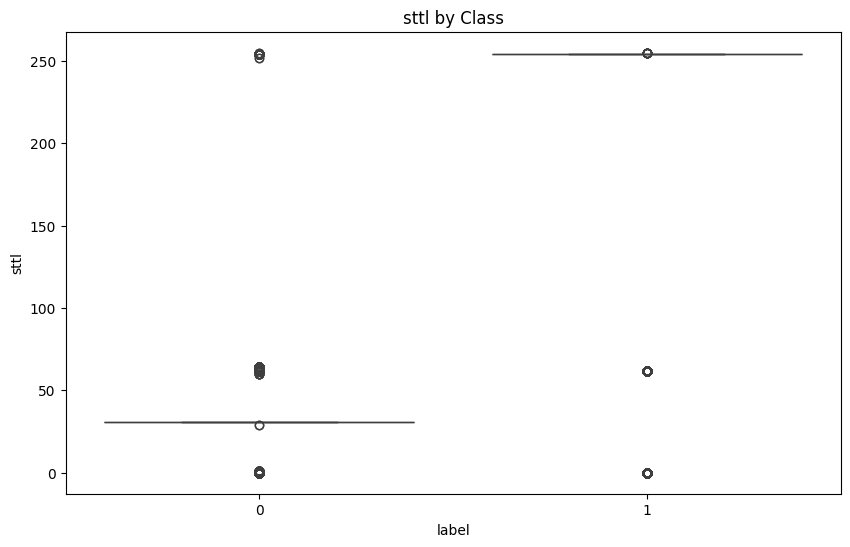

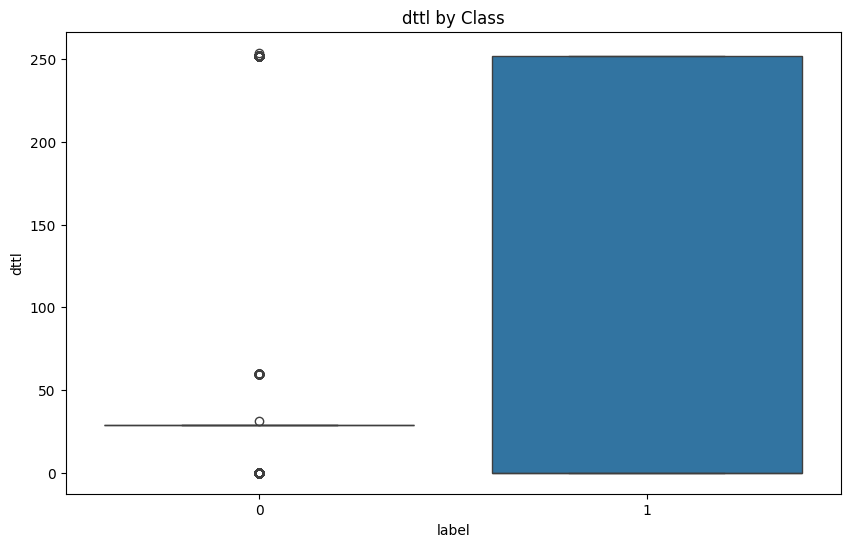

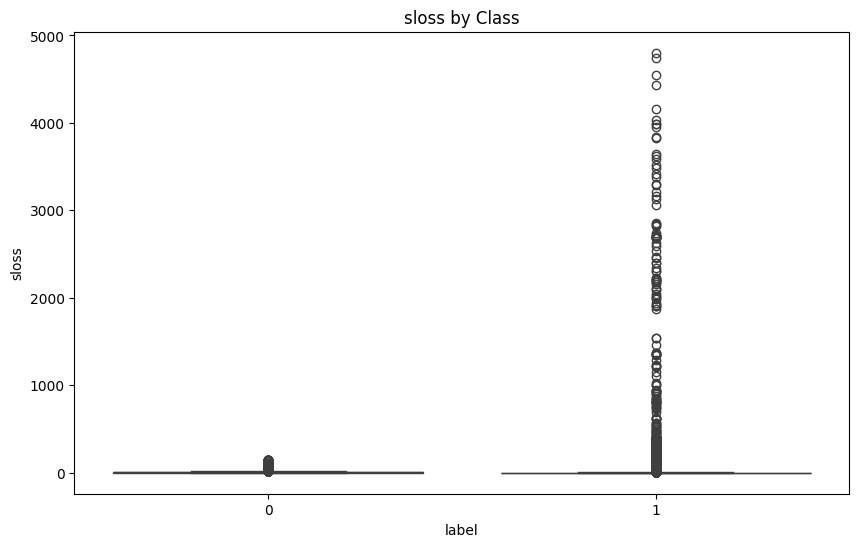

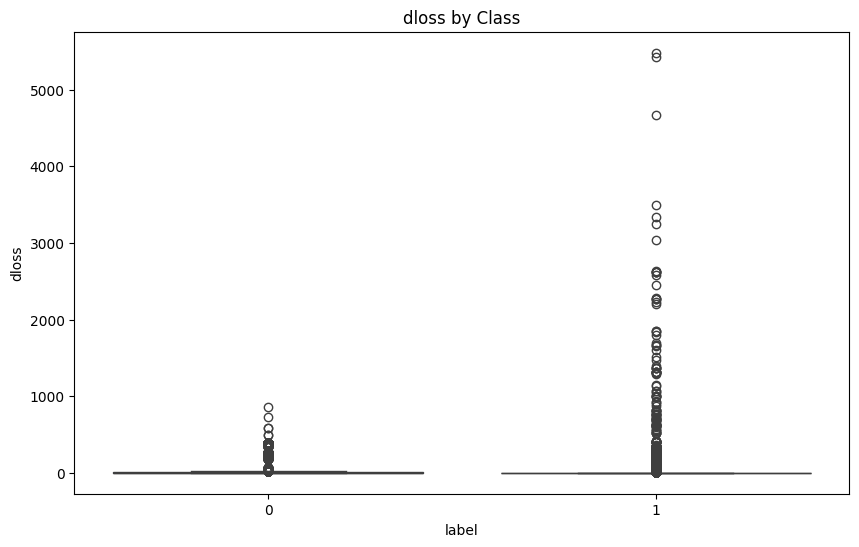

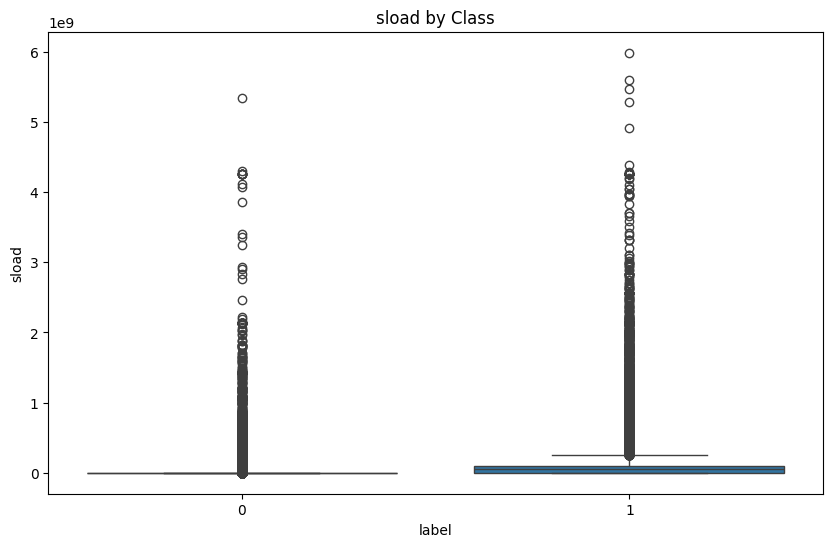

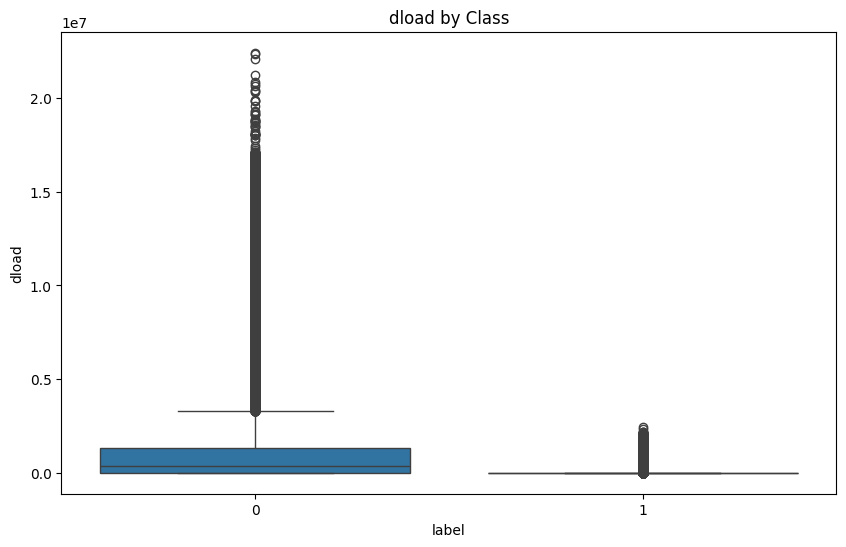

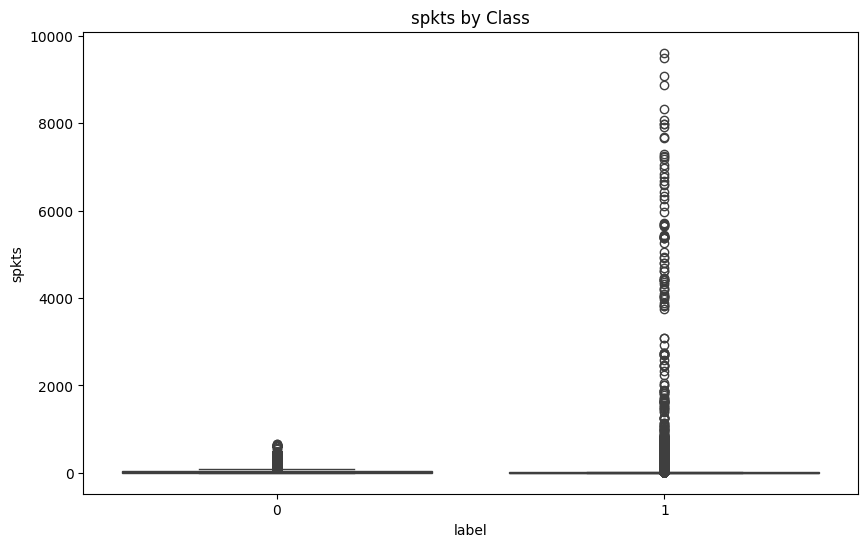

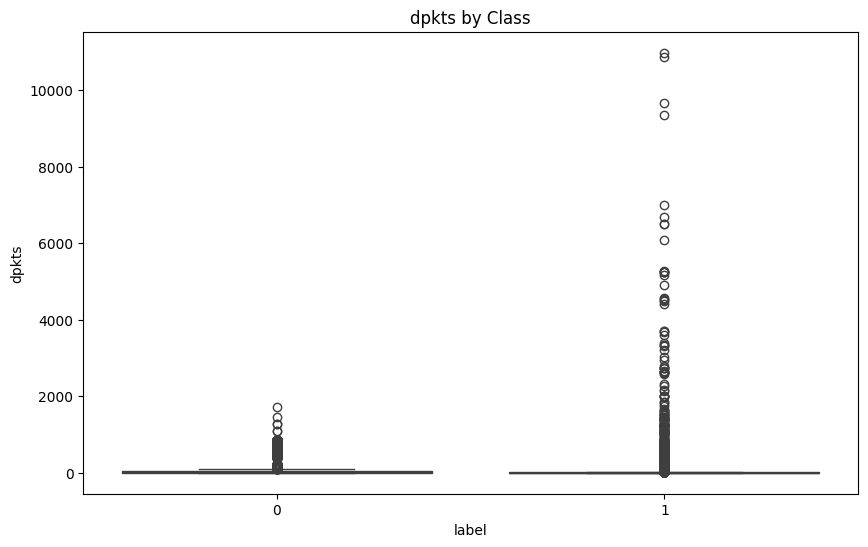

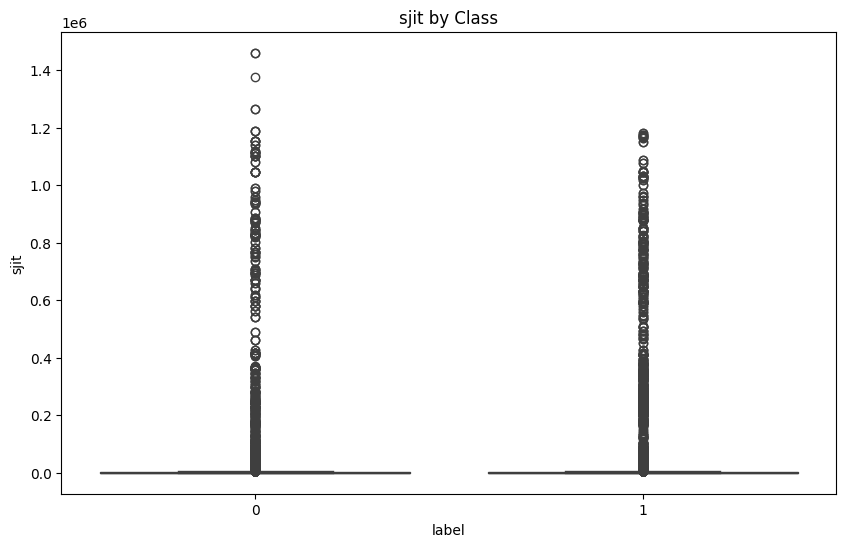

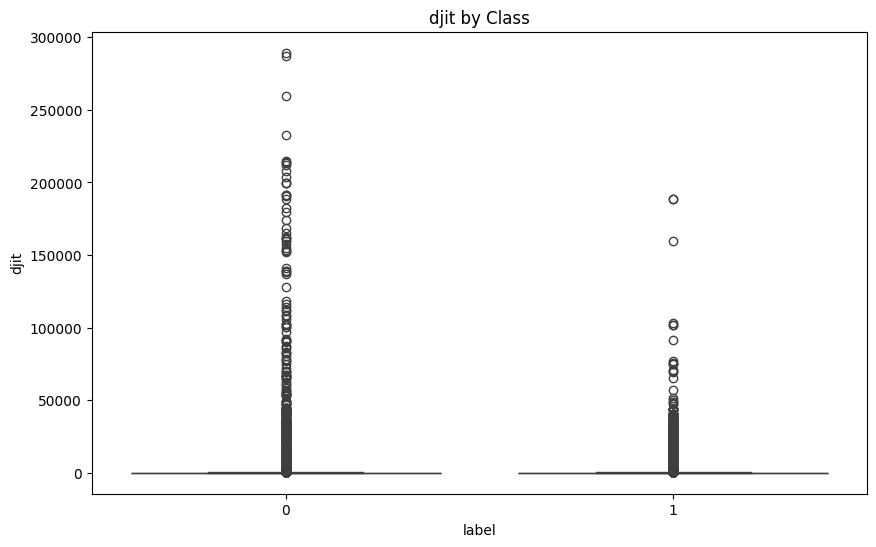

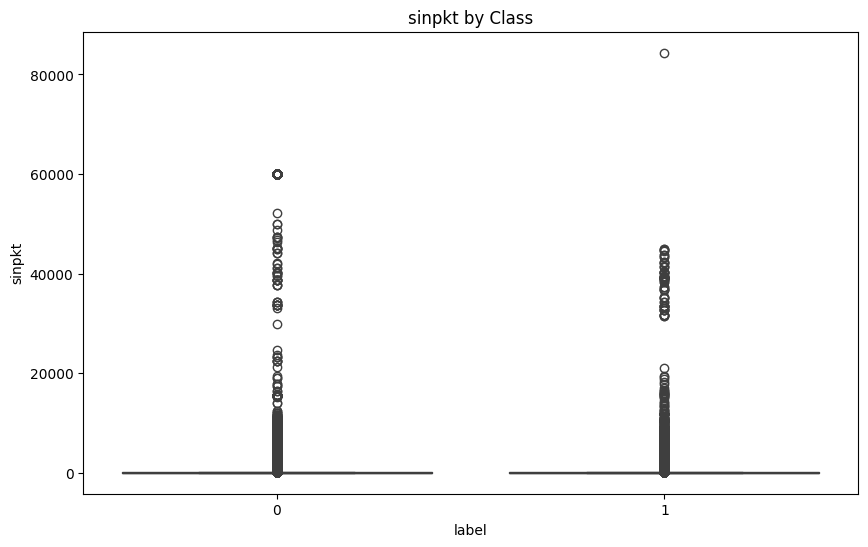

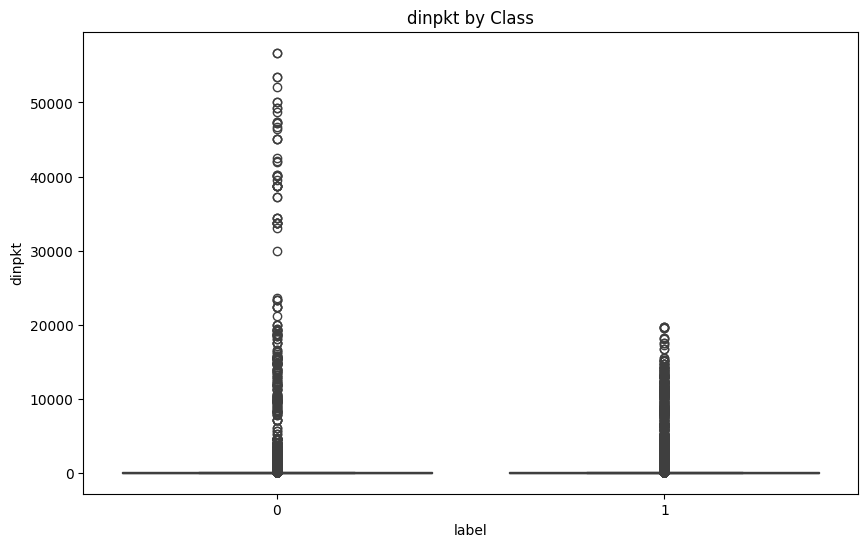

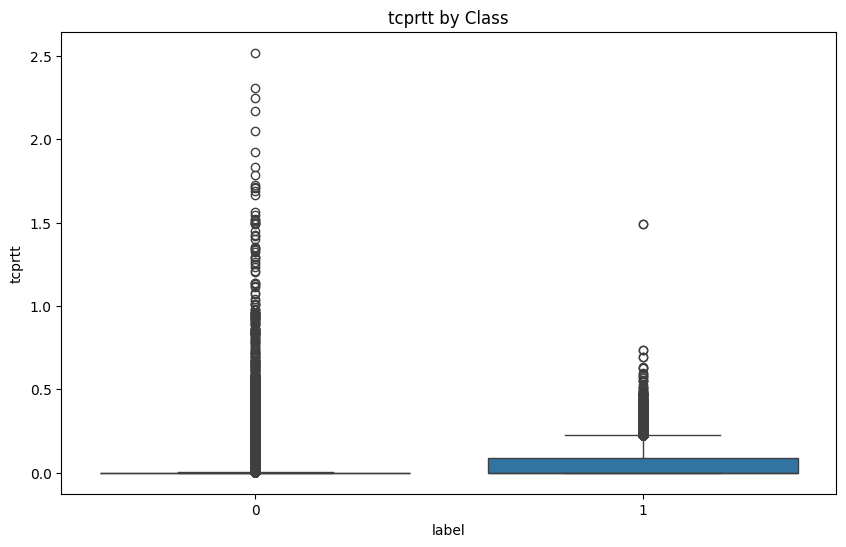

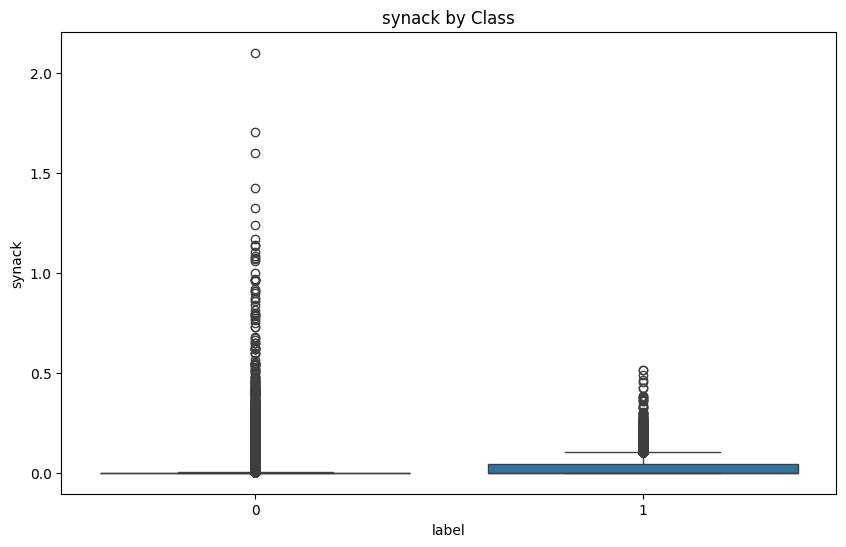

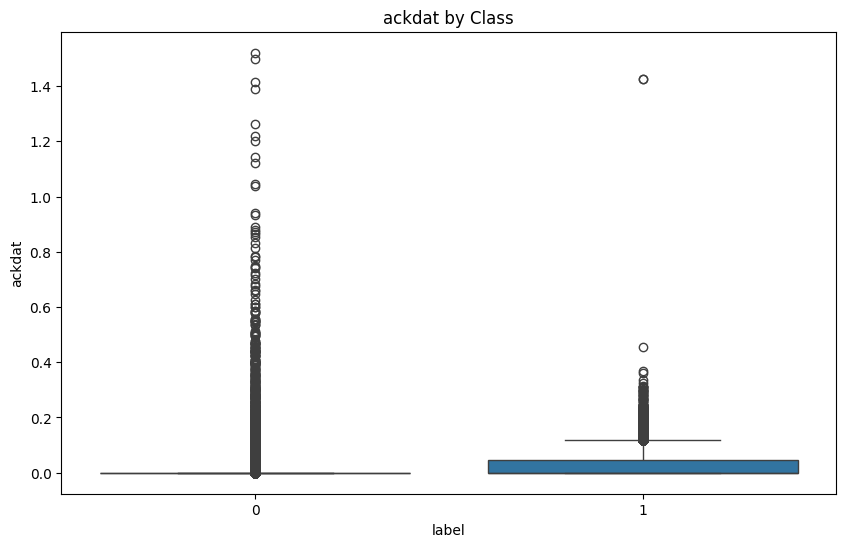

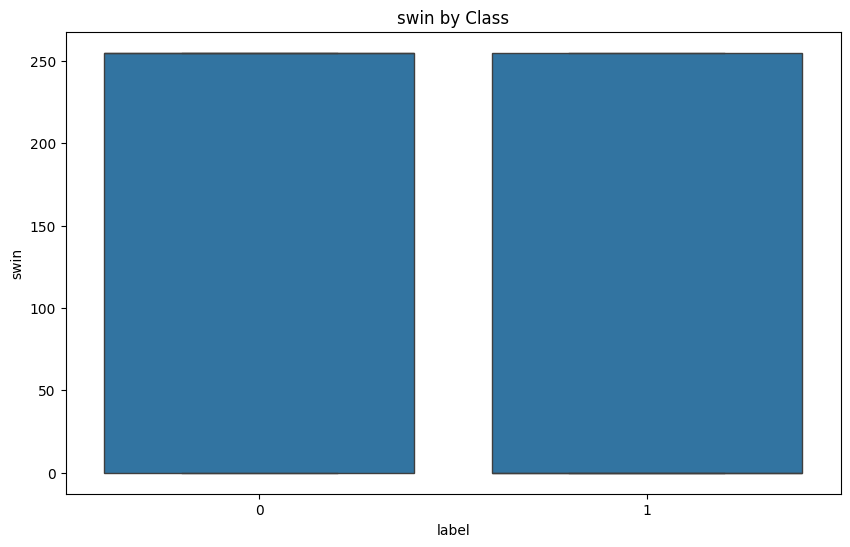

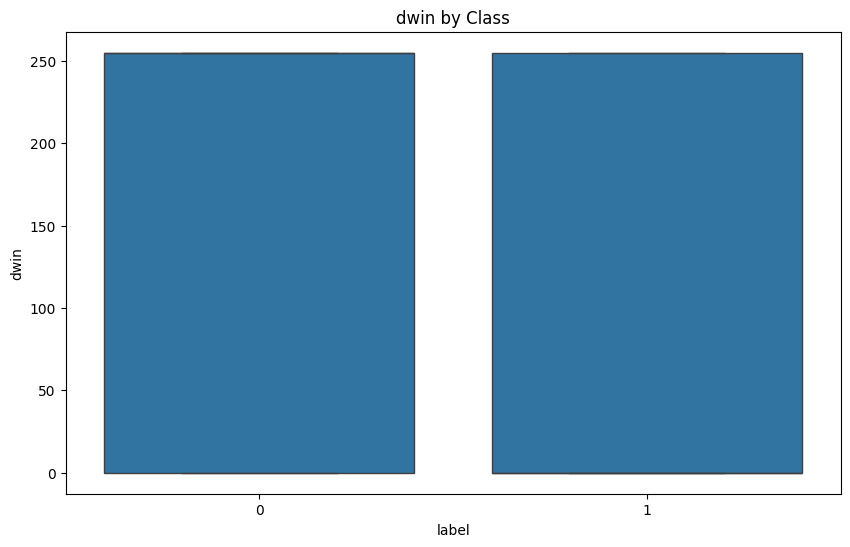

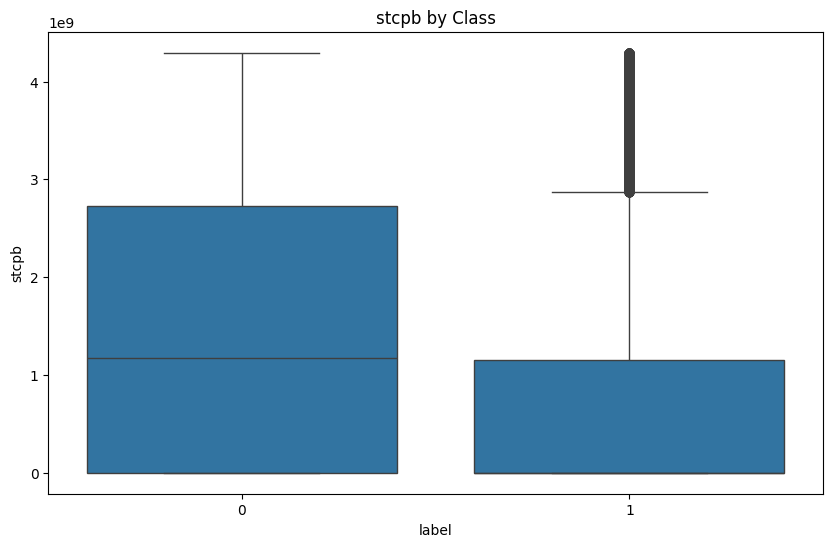

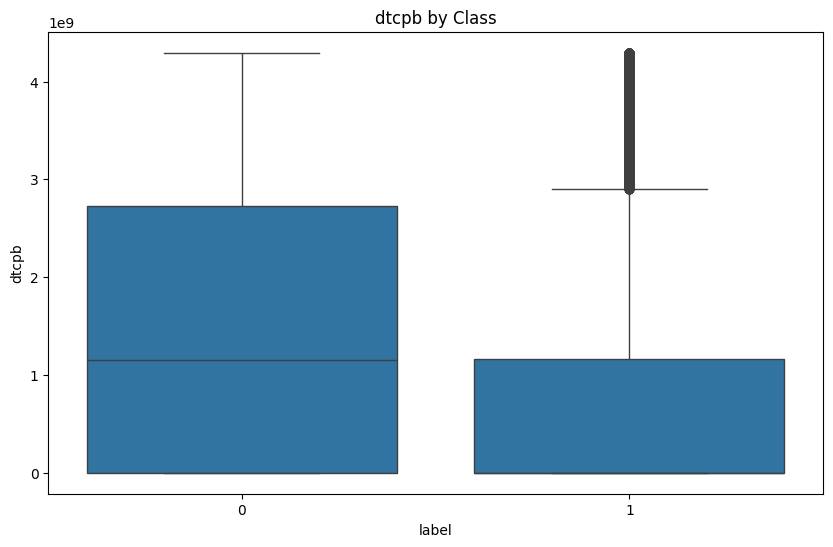

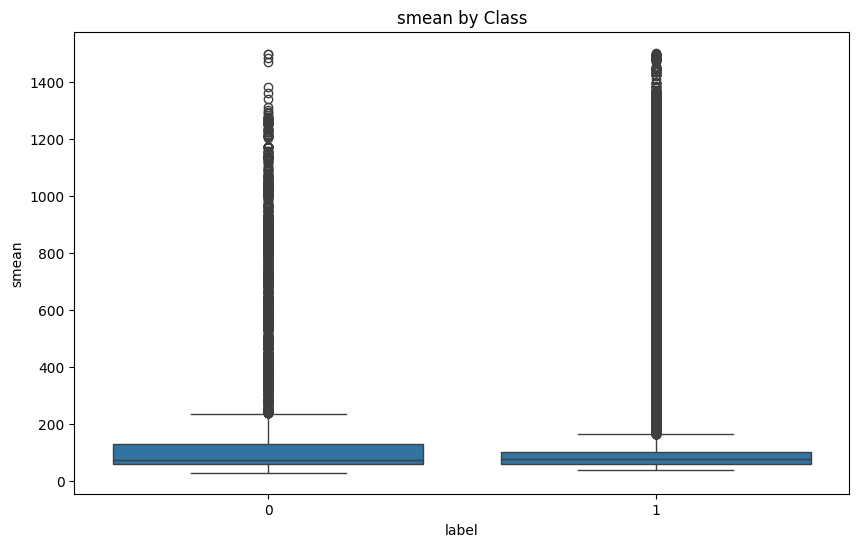

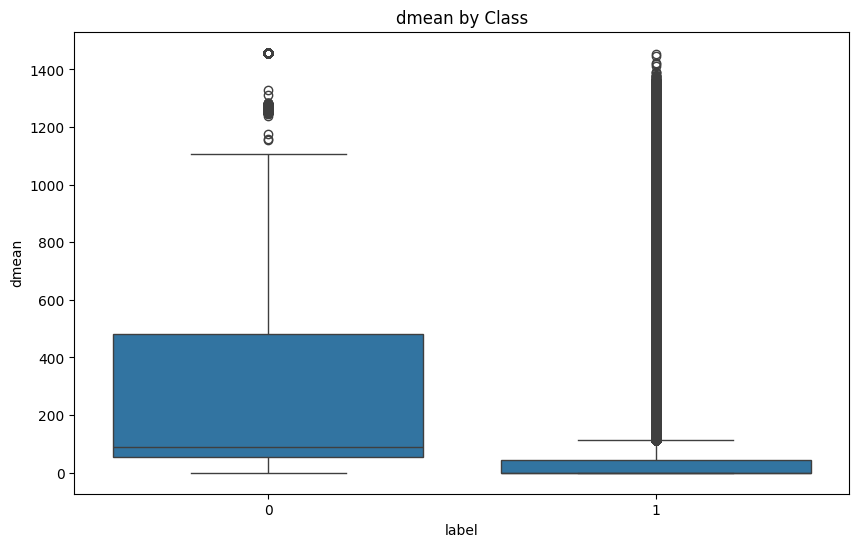

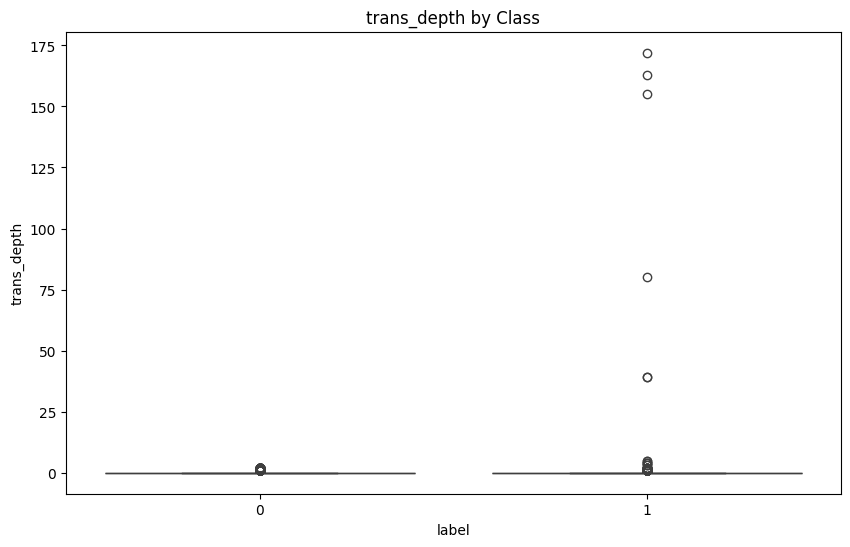

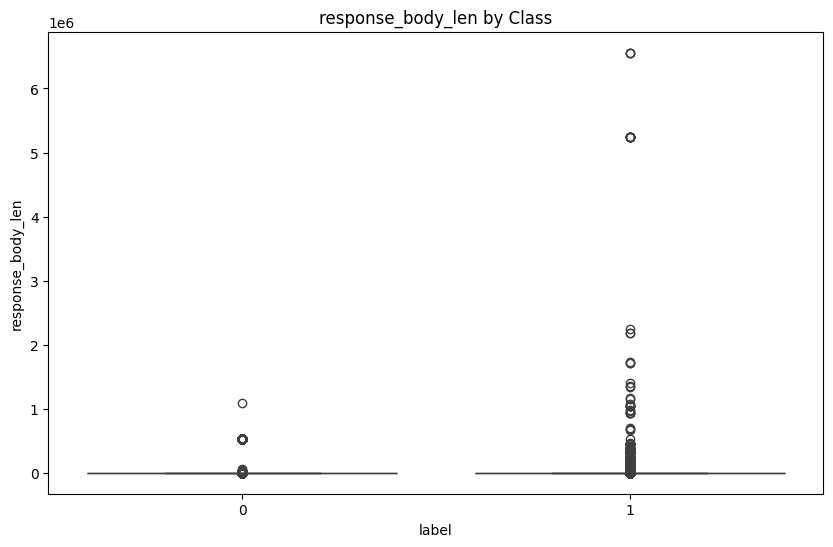

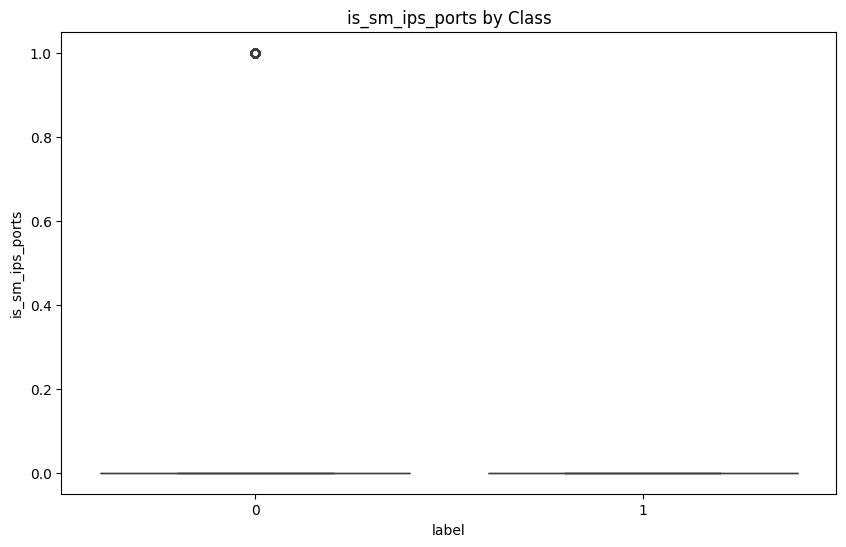

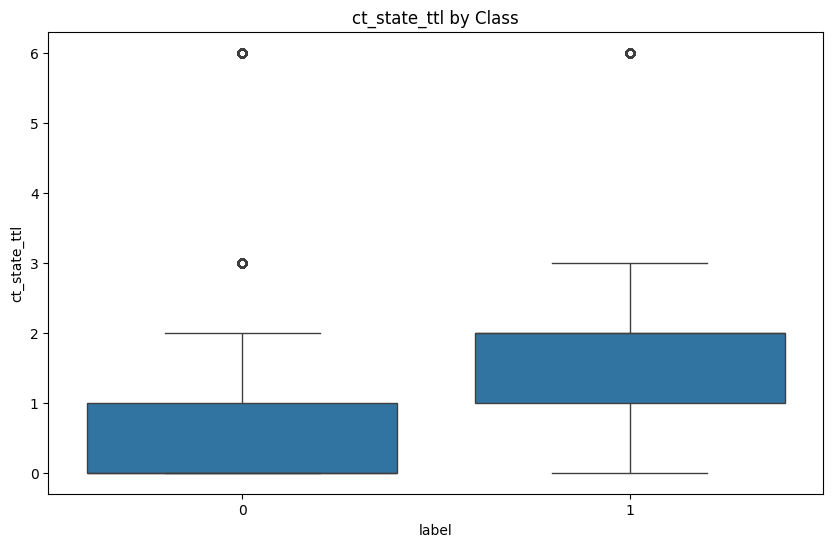

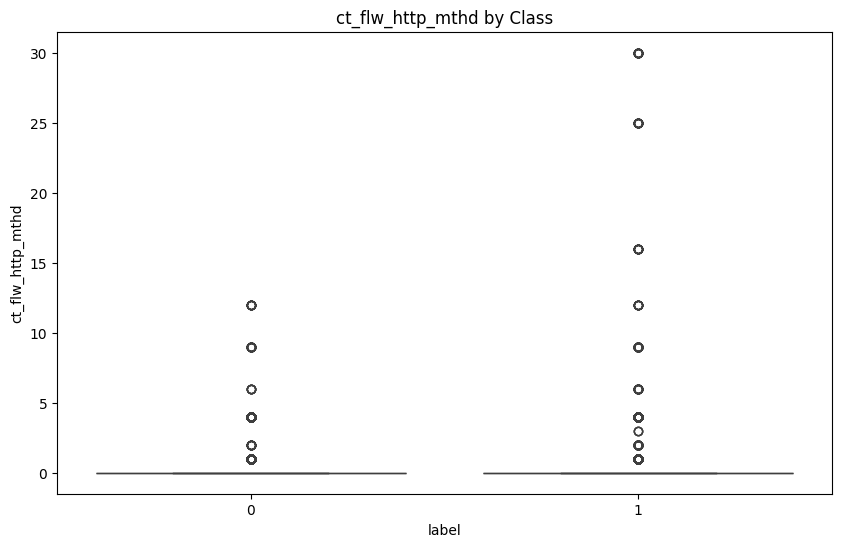

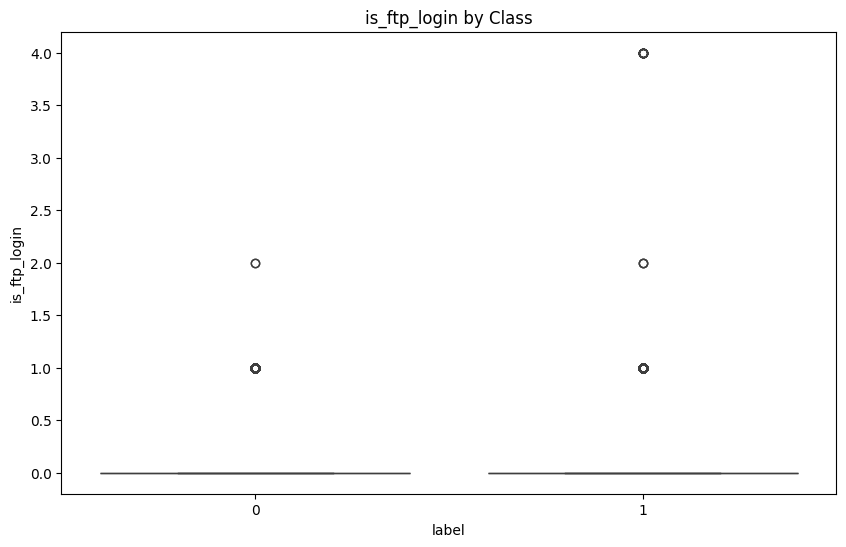

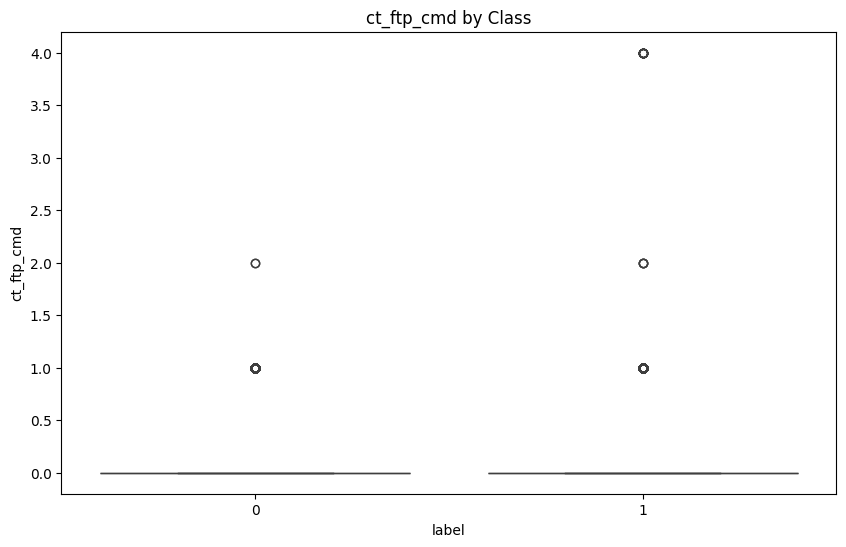

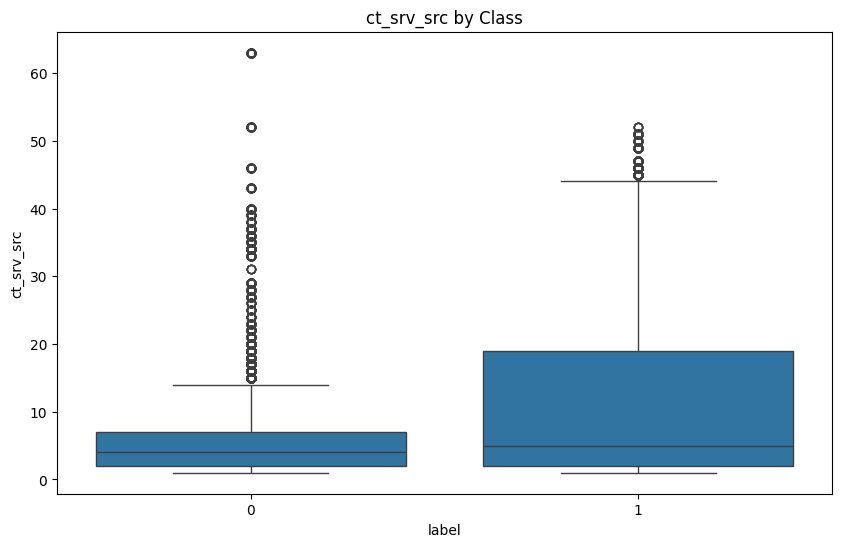

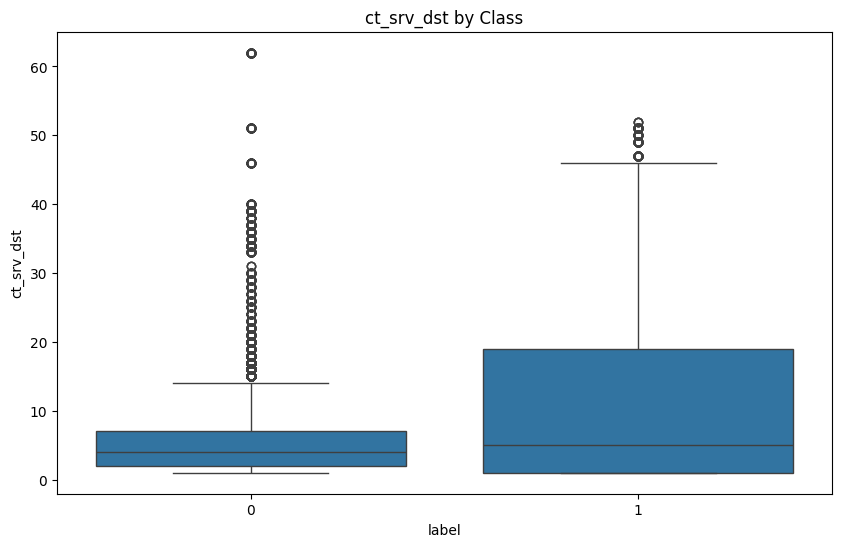

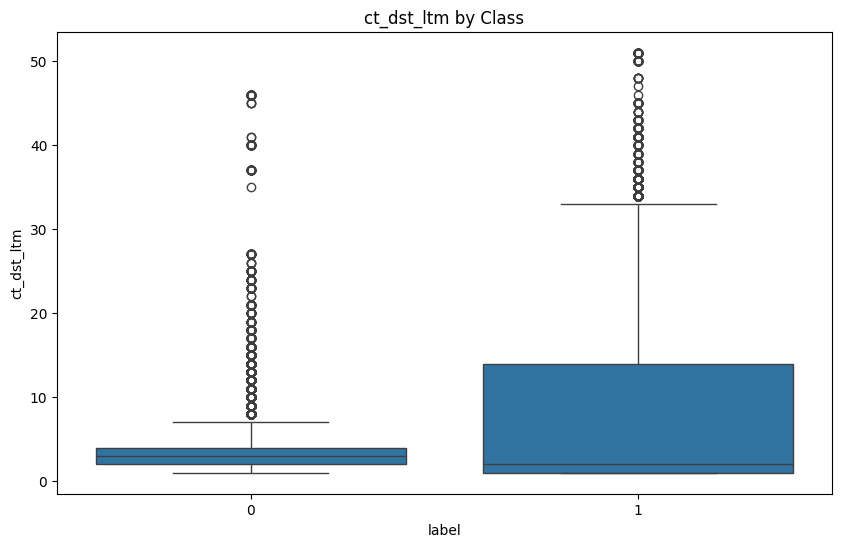

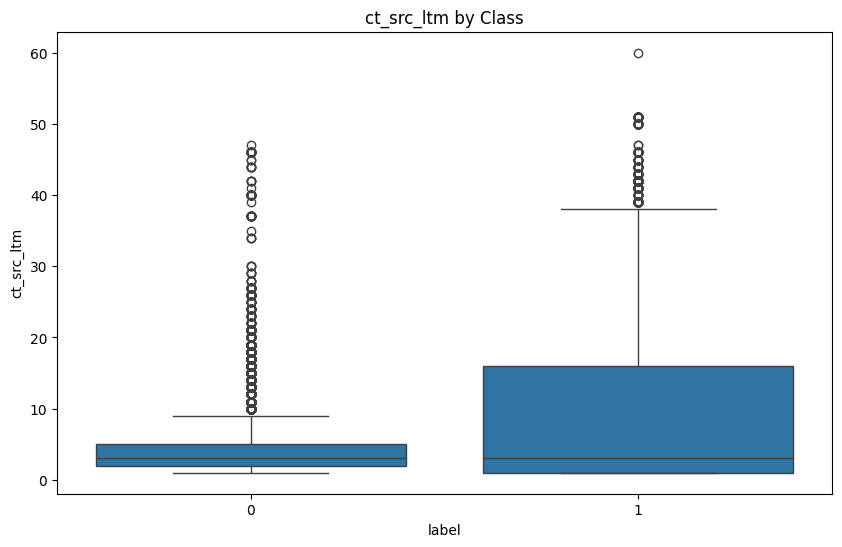

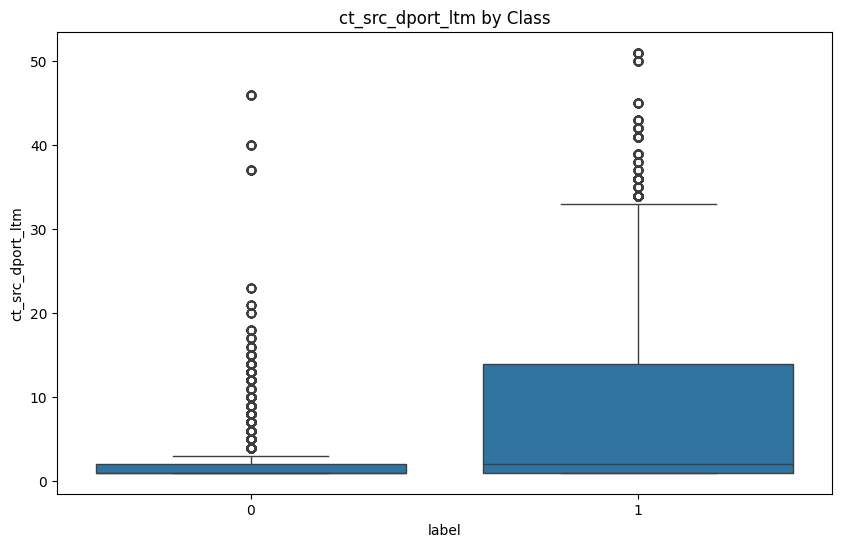

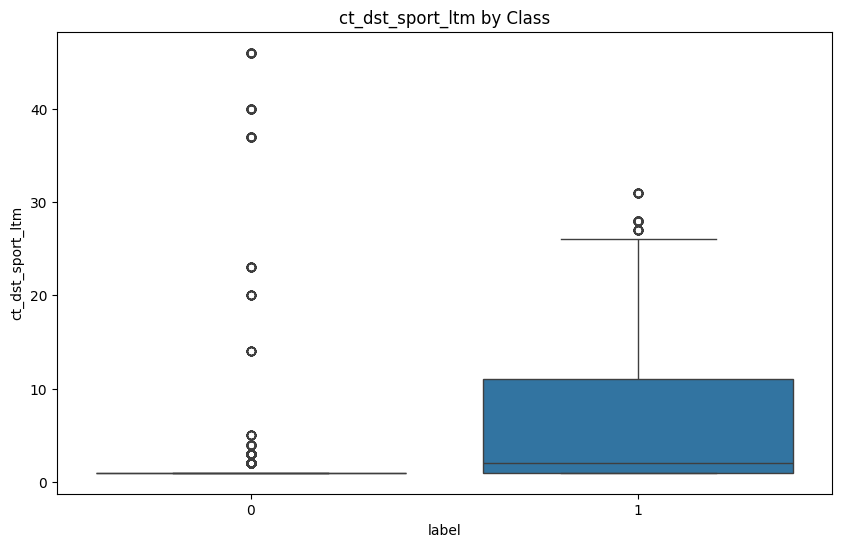

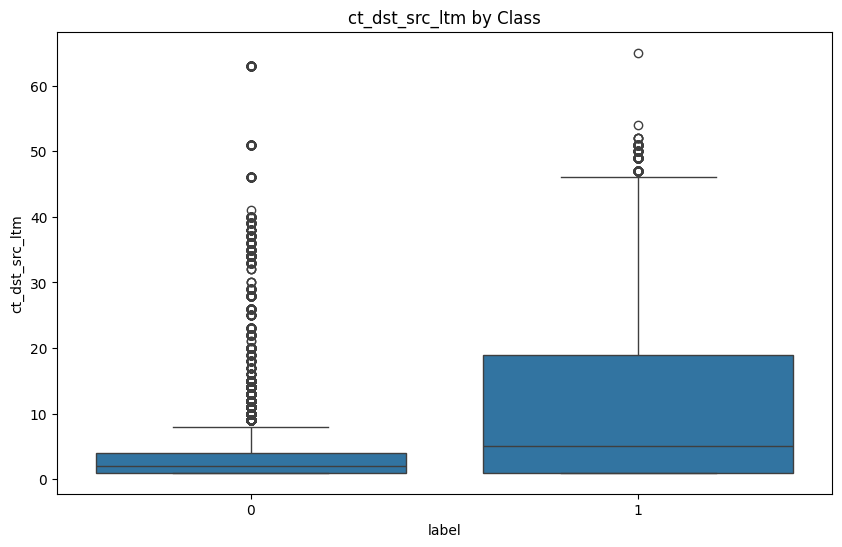

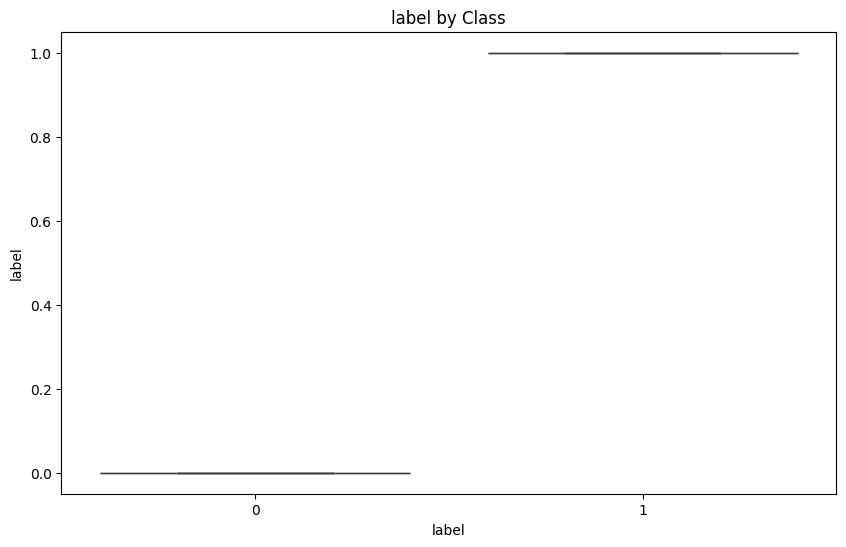

In [16]:
# the bocplot of each features
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='label', y=column)
    plt.title(f'{column} by Class')
    plt.show()


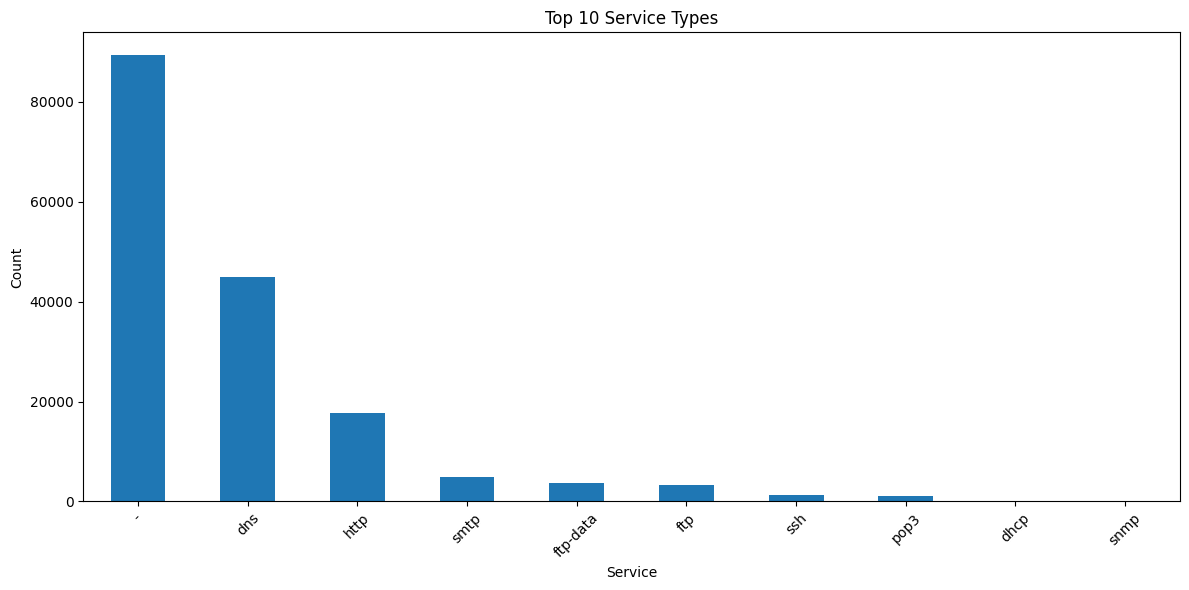

In [17]:
# 6. Additional visualizations
# Service type distribution
plt.figure(figsize=(12, 6))
train_df['service'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Service Types')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [18]:
# Check missing values in training set
print("Missing values in training set:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

# Calculate percentage of missing values
missing_percentages = (train_df.isnull().sum() / len(train_df)) * 100
print("\nPercentage of missing values:")
print(missing_percentages[missing_percentages > 0])

Missing values in training set:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src

In [19]:
def handle_missing_data(df):
    print("Before handling missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    
    # Make a copy to avoid modifying original
    df_clean = df.copy()
    
    # Separate columns by type
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_clean.select_dtypes(include=['object']).columns

    # 1. Handle numeric features
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use median for features with outliers
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # 2. Handle categorical features
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use mode for categorical
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    print("\nAfter handling missing values:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
    
    return df_clean

# Apply missing data handling
train_df_clean = handle_missing_data(train_df)

# count missing value for each feature
missing_values = train_df_clean.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Before handling missing values:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src

In [20]:
train_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   state              175341 non-null  object 
 1   dur                175341 non-null  float64
 2   sbytes             175341 non-null  float64
 3   dbytes             175341 non-null  float64
 4   sttl               175341 non-null  float64
 5   dttl               175341 non-null  float64
 6   sloss              175341 non-null  float64
 7   dloss              175341 non-null  float64
 8   service            175341 non-null  object 
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  spkts              175341 non-null  float64
 12  dpkts              175341 non-null  float64
 13  proto              175341 non-null  object 
 14  sjit               175341 non-null  float64
 15  djit               175341 non-null  float64
 16  si

### The reasoning behind choosing Data Imputation with Mean/Median/Mode Strategy : 
1. **Systematic Pattern in Missing Data**  
    The consistent ~5% missing rate across all features (ranging from 4.85% to 5.10%) indicates a systematic pattern in how network traffic data was collected or processed, rather than random missing values. This suggests that using imputation would maintain the underlying data patterns rather than introducing bias.

2. **Data Volume Preservation**  
    With approximately 8,750 samples (5% of data) containing missing values, deletion would significantly reduce our dataset size. In network security, every sample could contain valuable attack patterns, and removing this much data could particularly impact our ability to detect rare attack types.

3. **Feature Interdependence**  
    Network traffic features are inherently interconnected (e.g., source bytes with destination bytes, packet counts with byte counts). Using median/mode imputation preserves these relationships better than deletion, as it maintains the natural distributions and correlations between features.

4. **Practical Implementation Benefits**  
    Using median for numeric and mode for categorical data provides a computationally efficient, easily reproducible approach that can be consistently applied to both training and validation sets while preserving the dataset's size and feature distributions.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# check the count of outliers for each feature before removing them
for column in train_df_clean.columns:
    if train_df_clean[column].dtype == 'object':
        continue
    print(column)
    q1 = train_df_clean[column].quantile(0.25)
    q3 = train_df_clean[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(train_df_clean[(train_df_clean[column] < lower_bound) | (train_df_clean[column] > upper_bound)][column].count())

dur
15994
sbytes
23142
dbytes
30374
sttl
0
dttl
0
sloss
27947
dloss
26996
sload
12907
dload
39592
spkts
23470
dpkts
19752
sjit
20205
djit
20609
sinpkt
15717
dinpkt
17320
tcprtt
21852
synack
38551
ackdat
13634
swin
0
dwin
0
stcpb
0
dtcpb
0
smean
19690
dmean
22697
trans_depth
16948
response_body_len
10723
is_sm_ips_ports
2632
ct_state_ttl
1838
ct_flw_http_mthd
16996
is_ftp_login
2443
ct_ftp_cmd
2443
ct_srv_src
22771
ct_srv_dst
22825
ct_dst_ltm
30290
ct_src_ltm
18116
ct_src_dport_ltm
35713
ct_dst_sport_ltm
35385
ct_dst_src_ltm
24432
label
0


In [ ]:
# Select only numeric columns
train_df_clean_numeric = train_df_clean.select_dtypes(include=['float64', 'int64'])

# Apply log1p transformation only to numeric columns
train_df_clean_log_transformed = train_df_clean_numeric.apply(lambda x: np.log1p(x))

# View the transformed data
train_df_clean_log_transformed.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,1.318193,9.499347,13.214426,3.465736,3.401197,3.091042,5.288267,10.567720,14.284843,5.451038,6.084499,8.400684,8.082041,2.552998,1.982567,0.000000,0.000444,0.000114,5.545177,5.545177,20.002714,20.015217,4.077537,3.806662,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.484907,1.609438,1.791759,1.609438,1.098612,0.693147,1.791759,0.000000
1,0.000009,4.744932,0.000000,5.541264,0.000000,0.000000,0.000000,17.740779,0.000000,1.098612,0.000000,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060443,0.000000,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,2.397895,2.397895,2.397895,2.397895,0.693147,2.397895,2.397895,0.693147
2,1.915234,8.716536,8.266935,5.541264,5.533389,2.639057,2.639057,9.011971,8.560705,3.610918,3.555348,9.055094,5.525256,5.114313,5.155288,0.147407,0.056288,0.096150,5.545177,5.545177,22.067657,19.118830,5.141664,4.744932,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,1.609438,1.609438,1.098612,1.098612,0.693147,0.693147,1.609438,0.693147
3,1.578903,10.133050,5.105945,3.465736,3.401197,3.663562,5.968708,10.862265,14.636370,6.107023,6.755769,8.307481,7.979247,2.268991,1.704149,0.000558,0.000448,0.000000,5.545177,5.545177,0.000000,20.309935,4.043051,7.152269,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.302585,2.302585,1.386294,1.098612,1.098612,0.693147,1.945910,0.000000
4,0.001051,4.875197,5.093750,5.541264,3.401197,0.000000,0.000000,13.110893,13.330955,1.098612,1.098612,0.000000,0.000000,0.007968,0.006976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.189655,4.406719,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.386294,1.386294,1.609438,1.386294,0.693147,0.693147,0.693147,0.000000


In [54]:
# After log transformation, check the count of outliers for each feature
print("Outliers count after log transformation:")
for column in train_df_clean_log_transformed.columns:
    print(column)
    q1 = train_df_clean_log_transformed[column].quantile(0.25)
    q3 = train_df_clean_log_transformed[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(train_df_clean_log_transformed[(train_df_clean_log_transformed[column] < lower_bound) | (train_df_clean_log_transformed[column] > upper_bound)][column].count())


Outliers count after log transformation:
dur
10505
sbytes
3139
dbytes
0
sttl
3090
dttl
0
sloss
7576
dloss
13440
sload
0
dload
0
spkts
3837
dpkts
1654
sjit
0
djit
40
sinpkt
2537
dinpkt
168
tcprtt
19983
synack
38433
ackdat
12739
swin
0
dwin
0
stcpb
0
dtcpb
0
smean
16686
dmean
0
trans_depth
16948
response_body_len
10723
is_sm_ips_ports
2632
ct_state_ttl
40659
ct_flw_http_mthd
16996
is_ftp_login
2443
ct_ftp_cmd
2443
ct_srv_src
0
ct_srv_dst
0
ct_dst_ltm
181
ct_src_ltm
183
ct_src_dport_ltm
9480
ct_dst_sport_ltm
29862
ct_dst_src_ltm
0
label
0


In [25]:
# Write your code here

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [26]:
num_duplicates = train_df_clean.duplicated().sum()
print(f"Number of duplidated columns: {num_duplicates}")

Number of duplidated columns: 23597


In [27]:
train_df_unique = train_df_clean.drop_duplicates()

# Check the shape of the new dataframe
train_df_unique.head()

,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,tcp,4449.110313,3234.831566,11.845558,6.261361,0.000000,0.000444,0.000114,255.0,255.0,4.864839e+08,492604340.0,58.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4.0,5.0,4.0,2.0,1.0,5.0,Normal,0
1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,57.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,Generic,1
2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,255.0,255.0,3.835852e+09,201002858.0,170.0,114.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,Exploits,1
3,FIN,3.849634,25160.0,164.0,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,0.000000,255.0,255.0,0.000000e+00,661443578.0,56.0,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,Normal,0
4,CON,0.001052,130.0,162.0,254.0,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,65.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,1.0,1.0,Normal,0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif

def enhanced_network_features(df):
    """Comprehensive feature engineering for network traffic"""
    print("Applying multiple feature engineering strategies...")
    df_new = df.copy()
    
    # 1. Feature Selection (Top 20 most important)
    numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
    X = df_new[numeric_cols].drop(['label'], axis=1, errors='ignore')
    y = df_new['label']
    selector = SelectKBest(f_classif, k=20)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()].tolist()
    
    # Keep selected features plus label and attack_cat
    columns_to_keep = selected_features + ['label', 'attack_cat']
    df_new = df_new[columns_to_keep]

    print("\nFeature engineering summary:")
    print(f"Selected {len(selected_features)} features")
    
    return df_new, selected_features

# Apply enhanced feature engineering and display results
train_df_engineered, selected_features = enhanced_network_features(train_df_unique)

# Verify results
print("\nColumns in engineered dataset:")
print(train_df_engineered.columns.tolist())

Applying multiple feature engineering strategies...

Feature engineering summary:
Selected 20 features

Columns in engineered dataset:
['sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmean', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label', 'attack_cat']


### The reasoning behind choosing Feature Selection, Creating New Features Strategy, and Binning or Discretization for Network Traffic Data : 
1. **Comprehensive Pattern Detection**  
    Network traffic analysis requires understanding data at multiple levels of abstraction. By implementing three complementary strategies - feature selection, new feature creation, and binning - we create a robust feature set that captures different aspects of network behavior. Feature selection helps identify the most relevant metrics, new feature creation reveals hidden relationships through ratios and combinations, while binning helps categorize continuous data like duration into meaningful groups. This multi-faceted approach is particularly valuable for detecting various attack patterns, as different types of attacks may manifest in different ways within the network data.

2. **Balance Between Information and Complexity**  
    Using these three specific strategies provides an optimal balance between capturing useful patterns and maintaining manageable complexity. Feature selection reduces noise by keeping only the most informative features, new feature creation adds domain-specific insights through engineered combinations, and binning helps handle outliers and creates more interpretable categories. This combination ensures we're not overwhelming the model with redundant or irrelevant features while still maintaining enough information to detect subtle attack patterns.

3. **Practical Implementation Benefits**   
    The chosen strategies complement each other in implementation. Feature selection helps control the dimensionality after we create new features, while binning helps normalize certain metrics that might be skewed. This synergy between strategies makes the feature engineering process more effective than using any single strategy alone. For example, after creating new ratio features, feature selection can help identify which of these new features are most useful, while binning helps handle any extreme values that might appear in these ratios.

4. **Network Security Domain Alignment**  
    These three strategies align well with network security requirements. Network attacks often manifest in relationships between metrics (handled by new feature creation), have varying importance of different indicators (addressed by feature selection), and include temporal patterns that benefit from categorization (managed through binning). Together, they create a feature set that security professionals can interpret while maintaining the mathematical properties needed for effective machine learning.

# 2. Split Training Set and Validation Set and Preprocess

## A. Split Data

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [29]:
# After merging data into train_df:

from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(
    train_df_engineered,
    test_size=0.2,  # 80% train, 20% validation
    random_state=42,  # For reproducibility
    stratify=train_df_engineered['attack_cat']  # Maintain attack category distribution
)

# Verify split sizes
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)

# Verify class distribution
print("\nClass distribution in splits:")
print("\nTraining:")
print(train_set['attack_cat'].value_counts(normalize=True))
print("\nValidation:")
print(val_set['attack_cat'].value_counts(normalize=True))

# Separate features and labels
y_train = train_set['attack_cat']
X_train = train_set.drop(['attack_cat', 'label'], axis=1, errors='ignore')

y_val = val_set['attack_cat']
X_val = val_set.drop(['attack_cat', 'label'], axis=1, errors='ignore')

Training set shape: (121395, 22)
Validation set shape: (30349, 22)

Class distribution in splits:

Training:
attack_cat
Normal            0.362239
Exploits          0.190362
Generic           0.175798
Fuzzers           0.117550
DoS               0.061905
Reconnaissance    0.059887
Analysis          0.012735
Backdoor          0.011236
Shellcode         0.007430
Worms             0.000857
Name: proportion, dtype: float64

Validation:
attack_cat
Normal            0.362220
Exploits          0.190352
Generic           0.175788
Fuzzers           0.117566
DoS               0.061913
Reconnaissance    0.059903
Analysis          0.012752
Backdoor          0.011236
Shellcode         0.007414
Worms             0.000857
Name: proportion, dtype: float64


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [30]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [31]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [32]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [33]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [34]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [35]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import pandas as pd

# class NetworkDimensionalityReducer(BaseEstimator, TransformerMixin):
#     """Network traffic dimensionality reduction using PCA."""
#     def __init__(self, n_components=15):
#         self.n_components = n_components
#         self.scaler = StandardScaler()
#         self.pca = PCA(n_components=n_components)
        
#     def fit(self, X, y=None):
#         """Learn PCA parameters from training data"""
#         X_scaled = self.scaler.fit_transform(X)
#         self.pca.fit(X_scaled)
#         return self
        
#     def transform(self, X):
#         """Apply PCA transformation"""
#         X_scaled = self.scaler.transform(X)
#         X_pca = self.pca.transform(X_scaled)
#         return pd.DataFrame(
#             X_pca,
#             columns=[f'PC{i+1}' for i in range(self.n_components)],
#             index=range(X.shape[0])
#         )

### The reasoning behind choosing Principal Component Analysis (PCA) Strategy for for Network Traffic Dimensionality Reduction : 
1. **Dimensionality Reduction with Interpretability**  
    Principal Component Analysis provides an ideal balance between reducing data complexity and maintaining interpretability in network traffic analysis. By achieving 85% variance explanation with just 15 components (down from many original features), we significantly simplify the data while preserving crucial attack patterns. The linear transformation nature of PCA aligns well with network traffic metrics, where many features have linear relationships (like bytes and packets). This makes PCA particularly suitable compared to non-linear methods like t-SNE or autoencoders, which might overcomplicate the analysis without providing significant benefits.

2. **Computational Efficiency and Scalability**  
    Network traffic data often includes many correlated features and high dimensionality. PCA's efficient computation makes it particularly suitable for large-scale network analysis, especially compared to more complex alternatives. Our results show a clear hierarchical importance of components (22.91% for PC1, gradually decreasing), indicating that PCA effectively captures the major patterns in the data while reducing noise. This efficiency is crucial for real-time or near-real-time network security applications.

3. **Clear Component Contribution Analysis**  
    The cumulative explained variance results (54% with 5 components, 74% with 10, and 85% with 15) provide transparent insight into how much information we retain. This transparency is vital in network security, where understanding the contribution of different features to attack detection is crucial. The gradual decrease in component importance suggests we're capturing real patterns rather than noise, making our dimensionality reduction both effective and trustworthy.

4. **Practical Implementation Benefits**  
    PCA's compatibility with sklearn's transformer pattern makes it easy to integrate into our preprocessing pipeline. The ability to reverse-engineer component meanings through feature importance analysis helps security analysts understand what patterns the model is detecting. This balance of technical effectiveness and practical interpretability makes PCA the optimal choice for network traffic dimensionality reduction.

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Define feature types based on X_train
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print("\nNumeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

# Define the numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15))
])

# Define the categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(
        drop='first',
        sparse_output=False,  
        handle_unknown='ignore'
    ))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create the final pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_preprocessed = pipe.fit_transform(X_train)

# Transform the validation data
X_val_preprocessed = pipe.transform(X_val)

# Verify transformed data shapes
print("\n=== Transformed Data Shapes ===")
print(f"Training set shape: {X_train_preprocessed.shape}")
print(f"Validation set shape: {X_val_preprocessed.shape}")


Numeric features: ['sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmean', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
Categorical features: []

=== Transformed Data Shapes ===
Training set shape: (121395, 15)
Validation set shape: (30349, 15)


or create your own here

In [37]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [38]:
from models.knn import KNN

## B. Naive Bayes

In [39]:
from models.naive_bayes import GaussianNaiveBayes

In [50]:
# Create the sklearn Naive Bayes model
sklearn_nb = GaussianNB()

# Train the model
sklearn_nb.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_nb = sklearn_nb.predict(X_val_preprocessed)

# Calculate accuracy
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"\nOverall Accuracy (Naive Bayes): {accuracy_nb:.4f}")

# Generate detailed classification report
print("\nDetailed Classification Report (Naive Bayes):")
print(classification_report(y_val, y_pred_nb, zero_division=0))


Overall Accuracy (Naive Bayes): 0.5891

Detailed Classification Report (Naive Bayes):
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       387
      Backdoor       0.05      0.64      0.09       341
           DoS       0.14      0.06      0.09      1879
      Exploits       0.60      0.47      0.53      5777
       Fuzzers       0.42      0.18      0.25      3568
       Generic       0.88      0.94      0.91      5335
        Normal       0.93      0.77      0.84     10993
Reconnaissance       0.17      0.38      0.23      1818
     Shellcode       0.00      0.00      0.00       225
         Worms       0.06      0.04      0.05        26

      accuracy                           0.59     30349
     macro avg       0.32      0.35      0.30     30349
  weighted avg       0.68      0.59      0.62     30349



## C. ID3

In [51]:
from models.id3 import ID3DecisionTree

# Create and train the model
id3_tree = ID3DecisionTree(max_depth=10)
id3_tree.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred = id3_tree.predict(X_val_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Generate detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred, zero_division=0))



Overall Accuracy: 0.6989

Detailed Classification Report:
                precision    recall  f1-score   support

      Analysis       0.58      0.02      0.04       387
      Backdoor       0.00      0.00      0.00       341
           DoS       0.19      0.01      0.02      1879
      Exploits       0.49      0.83      0.61      5777
       Fuzzers       0.43      0.57      0.49      3568
       Generic       0.95      0.94      0.95      5335
        Normal       0.94      0.82      0.88     10993
Reconnaissance       0.38      0.16      0.22      1818
     Shellcode       0.00      0.00      0.00       225
         Worms       0.00      0.00      0.00        26

      accuracy                           0.70     30349
     macro avg       0.40      0.34      0.32     30349
  weighted avg       0.69      0.70      0.67     30349



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the sklearn ID3 model (using entropy criterion for ID3)
sklearn_id3 = DecisionTreeClassifier(
    criterion='entropy',     # ID3 uses entropy
    max_depth=10,           # Same as our custom implementation
    min_samples_split=2,    # Minimum samples required to split
    random_state=42         # For reproducibility
)

# Train the model
sklearn_id3.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_sklearn = sklearn_id3.predict(X_val_preprocessed)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_sklearn)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Generate detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred_sklearn))


Overall Accuracy: 0.7027

Detailed Classification Report:
                precision    recall  f1-score   support

      Analysis       0.40      0.01      0.01       387
      Backdoor       0.00      0.00      0.00       341
           DoS       0.19      0.01      0.01      1879
      Exploits       0.51      0.80      0.62      5777
       Fuzzers       0.41      0.70      0.52      3568
       Generic       0.98      0.94      0.96      5335
        Normal       0.95      0.81      0.88     10993
Reconnaissance       0.42      0.17      0.24      1818
     Shellcode       0.00      0.00      0.00       225
         Worms       0.17      0.04      0.06        26

      accuracy                           0.70     30349
     macro avg       0.40      0.35      0.33     30349
  weighted avg       0.70      0.70      0.68     30349



## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [42]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [43]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(test_df)

submission = pd.DataFrame({
    'id': test_df.index,
    'attack_cat': y_pred
})

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U4')) -> None

In [ ]:
submission.to_csv('submission.csv', index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`